# Credit Card Churning
![credit card](https://wallpapers.com/images/featured/credit-card-zd1f32hlhrhhourr.jpg)  

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning
---

---
# y_train table
---

In [2]:
y_train = pd.read_csv("y_train.csv")

In [3]:
y_train

,user_id,label
0,2723,1.0
1,44088,1.0
2,3139,0.0
3,25596,0.0
4,15409,0.0
...,...,...
489,31966,0.0
490,38383,0.0
491,41611,0.0
492,2526,0.0


**Check null value**

In [4]:
y_train.isnull().any()

user_id    False
label      False
dtype: bool

In [5]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  494 non-null    int64  
 1   label    494 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.8 KB


**Check how many distinct user_id**

In [6]:
y_train["user_id"].nunique()

494

**count credit that activated and inactivated**  
- 0 activate
- 1 inactivate

In [7]:
y_train.groupby(by = "label").count()

,user_id
label,
0.0,364
1.0,130


In [8]:
# Change label from float to int
y_train["label"].astype("int")

0      1
1      1
2      0
3      0
4      0
      ..
489    0
490    0
491    0
492    0
493    0
Name: label, Length: 494, dtype: int32

---
# demo table
---

In [9]:
demo = pd.read_csv("demo.csv")

In [10]:
demo

,user_id,account_start_date,birth_year,gender,marital_status,family_income_segment_code,individual_income_segment_code
0,27616,15/04/1975,1961,F,NaN,6,4
1,14619,31/01/1971,1943,F,1,4,9
2,13595,24/11/1960,1952,F,1,7,7
3,31656,25/05/1972,1952,F,2,3,13
4,6179,02/06/1957,1939,M,2,1,12
...,...,...,...,...,...,...,...
52757,13557,07/04/1976,1953,M,1,3,
52758,4293,02/11/1964,1944,M,1,6,3
52759,14627,20/01/1955,1930,M,3,6,2
52760,34018,24/05/1968,1929,M,1,6,4


In [11]:
demo.describe()

,user_id,birth_year
count,52762.000000,52762.000000
mean,26380.500000,1947.726830
std,15231.221788,9.799852
min,0.000000,1900.000000
25%,13190.250000,1942.000000
50%,26380.500000,1948.000000
75%,39570.750000,1954.000000
max,52761.000000,2000.000000


In [12]:
# Count unique user_id
demo["user_id"].nunique()

52762

In [13]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52762 entries, 0 to 52761
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   user_id                         52762 non-null  int64 
 1   account_start_date              52762 non-null  object
 2   birth_year                      52762 non-null  int64 
 3   gender                          52762 non-null  object
 4   marital_status                  52754 non-null  object
 5   family_income_segment_code      52762 non-null  object
 6   individual_income_segment_code  52762 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.8+ MB


In [14]:
# Strip white space to become empty space
demo["gender"] = demo["gender"].str.strip()
demo["marital_status"] = demo["marital_status"].str.strip()
demo["family_income_segment_code"] = demo["family_income_segment_code"].str.strip()
demo["individual_income_segment_code"] = demo["individual_income_segment_code"].str.strip()

In [15]:
# Replace nan with empty space 
demo = demo.replace(np.nan, "")

In [16]:
# Replace empty space with 0
demo = demo.replace("", "0")

In [17]:
# Change data type from object to int
demo["marital_status"] = demo["marital_status"].astype(str).astype(int)
demo["family_income_segment_code"] = demo["family_income_segment_code"].astype(str).astype(int)
demo["individual_income_segment_code"] = demo["individual_income_segment_code"].astype(str).astype(int)

In [18]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52762 entries, 0 to 52761
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   user_id                         52762 non-null  int64 
 1   account_start_date              52762 non-null  object
 2   birth_year                      52762 non-null  int64 
 3   gender                          52762 non-null  object
 4   marital_status                  52762 non-null  int32 
 5   family_income_segment_code      52762 non-null  int32 
 6   individual_income_segment_code  52762 non-null  int32 
dtypes: int32(3), int64(2), object(2)
memory usage: 2.2+ MB


**Find mode of marital status, family_income_segment_code, individual_income_segment_code and replace 0 with it**

**<u>marital_status<u>**

In [19]:
# Find mode of marital_status
demo.groupby(by = "marital_status").count()

,user_id,account_start_date,birth_year,gender,family_income_segment_code,individual_income_segment_code
marital_status,,,,,,
0,12295,12295,12295,12295,12295,12295
1,14531,14531,14531,14531,14531,14531
2,13099,13099,13099,13099,13099,13099
3,12837,12837,12837,12837,12837,12837


**1 is mode if not include 0 so replace 0 with 1**

In [20]:
# Replace marital_status 0 with 1
demo["marital_status"] = demo["marital_status"].replace(0,1)

In [21]:
demo

,user_id,account_start_date,birth_year,gender,marital_status,family_income_segment_code,individual_income_segment_code
0,27616,15/04/1975,1961,F,1,6,4
1,14619,31/01/1971,1943,F,1,4,9
2,13595,24/11/1960,1952,F,1,7,7
3,31656,25/05/1972,1952,F,2,3,13
4,6179,02/06/1957,1939,M,2,1,12
...,...,...,...,...,...,...,...
52757,13557,07/04/1976,1953,M,1,3,0
52758,4293,02/11/1964,1944,M,1,6,3
52759,14627,20/01/1955,1930,M,3,6,2
52760,34018,24/05/1968,1929,M,1,6,4


**<u>family_income_segment_code<u>**

In [22]:
# Find dmode of family_income_segment_code
demo.groupby(by = "family_income_segment_code").count()

,user_id,account_start_date,birth_year,gender,marital_status,individual_income_segment_code
family_income_segment_code,,,,,,
0,6822,6822,6822,6822,6822,6822
1,6638,6638,6638,6638,6638,6638
2,6379,6379,6379,6379,6379,6379
3,6564,6564,6564,6564,6564,6564
4,6751,6751,6751,6751,6751,6751
5,6579,6579,6579,6579,6579,6579
6,6426,6426,6426,6426,6426,6426
7,6603,6603,6603,6603,6603,6603


**4 is mode if not include 0 so replace 0 with 4**

In [23]:
demo["family_income_segment_code"] = demo["family_income_segment_code"].replace(0,4)

In [24]:
demo

,user_id,account_start_date,birth_year,gender,marital_status,family_income_segment_code,individual_income_segment_code
0,27616,15/04/1975,1961,F,1,6,4
1,14619,31/01/1971,1943,F,1,4,9
2,13595,24/11/1960,1952,F,1,7,7
3,31656,25/05/1972,1952,F,2,3,13
4,6179,02/06/1957,1939,M,2,1,12
...,...,...,...,...,...,...,...
52757,13557,07/04/1976,1953,M,1,3,0
52758,4293,02/11/1964,1944,M,1,6,3
52759,14627,20/01/1955,1930,M,3,6,2
52760,34018,24/05/1968,1929,M,1,6,4


**<u>individual_income_segment_code<u>**

In [25]:
demo.groupby(by = "individual_income_segment_code").count()

,user_id,account_start_date,birth_year,gender,marital_status,family_income_segment_code
individual_income_segment_code,,,,,,
0,3199,3199,3199,3199,3199,3199
1,3275,3275,3275,3275,3275,3275
2,3275,3275,3275,3275,3275,3275
3,3250,3250,3250,3250,3250,3250
4,3757,3757,3757,3757,3757,3757
5,3482,3482,3482,3482,3482,3482
6,3257,3257,3257,3257,3257,3257
7,3420,3420,3420,3420,3420,3420
8,3456,3456,3456,3456,3456,3456


**4 is the mode so replace 0 with 4**

In [26]:
demo["individual_income_segment_code"] = demo["individual_income_segment_code"].replace(0,4)

In [27]:
demo

,user_id,account_start_date,birth_year,gender,marital_status,family_income_segment_code,individual_income_segment_code
0,27616,15/04/1975,1961,F,1,6,4
1,14619,31/01/1971,1943,F,1,4,9
2,13595,24/11/1960,1952,F,1,7,7
3,31656,25/05/1972,1952,F,2,3,13
4,6179,02/06/1957,1939,M,2,1,12
...,...,...,...,...,...,...,...
52757,13557,07/04/1976,1953,M,1,3,4
52758,4293,02/11/1964,1944,M,1,6,3
52759,14627,20/01/1955,1930,M,3,6,2
52760,34018,24/05/1968,1929,M,1,6,4


**family_income and individual_income is an ordinal category so just leave it we have to change gender and marital status**

**Replace marital_status**
- 1 single
- 2 married
- 3 divorce/widow

In [28]:
# Replace marital_status from number to string
demo["marital_status"] = demo["marital_status"].replace({1:"single",2:"married",3:"divorce/widow"})
demo[["marital_status"]]

,marital_status
0,single
1,single
2,single
3,married
4,married
...,...
52757,single
52758,single
52759,divorce/widow
52760,single


In [29]:
# Get dummies variable for marital_status and * 1 to change Boolean to number
marital_status = pd.get_dummies(demo["marital_status"]) * 1

In [30]:
# Get dummies variable for gender and * 1 to change Boolean to number
gender = pd.get_dummies(demo["gender"]) * 1

In [31]:
# Merge dummies table
gender_marital_dum = pd.merge(marital_status, gender, left_index = True, right_index = True, how = "inner")
gender_marital_dum

,divorce/widow,married,single,F,M
0,0,0,1,1,0
1,0,0,1,1,0
2,0,0,1,1,0
3,0,1,0,1,0
4,0,1,0,0,1
...,...,...,...,...,...
52757,0,0,1,0,1
52758,0,0,1,0,1
52759,1,0,0,0,1
52760,0,0,1,0,1


In [32]:
# Drop columns gender and marital_status from demo table 
demo.drop(columns = ["gender", "marital_status"], inplace = True)

# Merge demo with gender_marital_dum
demo = pd.merge(demo, gender_marital_dum, left_index = True, right_index = True, how = "inner")
demo

,user_id,account_start_date,birth_year,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,M
0,27616,15/04/1975,1961,6,4,0,0,1,1,0
1,14619,31/01/1971,1943,4,9,0,0,1,1,0
2,13595,24/11/1960,1952,7,7,0,0,1,1,0
3,31656,25/05/1972,1952,3,13,0,1,0,1,0
4,6179,02/06/1957,1939,1,12,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
52757,13557,07/04/1976,1953,3,4,0,0,1,0,1
52758,4293,02/11/1964,1944,6,3,0,0,1,0,1
52759,14627,20/01/1955,1930,6,2,1,0,0,0,1
52760,34018,24/05/1968,1929,6,4,0,0,1,0,1


---
# cc_txn table
---

In [33]:
cc_txn = pd.read_csv("cc_txn.csv")

In [34]:
cc_txn

,mcc,txn_dt,user_id,txn_amt,card_no
0,mcc_cat10,2017-04-12,17863,16391.0,21616.0
1,mcc_cat11,2017-07-12,7682,117200.0,9438.0
2,mcc_cat12,2017-05-23,33603,55602.0,39476.0
3,mcc_cat4,2017-11-03,44040,38894.0,50979.0
4,mcc_cat14,2017-12-18,4529,29524.0,5582.0
...,...,...,...,...,...
3223070,mcc_cat9,2017-03-01,49742,8164.0,57110.0
3223071,mcc_cat8,2017-11-19,21085,31146.0,25328.0
3223072,mcc_cat3,2017-03-22,35306,31265.0,41396.0
3223073,mcc_cat11,2017-04-01,37777,11044.0,44154.0


In [35]:
cc_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223075 entries, 0 to 3223074
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   mcc      object 
 1   txn_dt   object 
 2   user_id  int64  
 3   txn_amt  float64
 4   card_no  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 123.0+ MB


**From hint user can have up to 3 credit cards select the one with the most transaction**

**Find maximum transaction card for each user**

In [36]:
# Group by user_id and card_no to find sum of transaction for each credit card
cc_txn_sum = cc_txn.groupby(by = ["user_id","card_no"]).agg(txn_sum = ("txn_amt","sum")).reset_index()
cc_txn_sum

,user_id,card_no,txn_sum
0,0,0.0,1746107.0
1,1,1.0,2234391.0
2,2,2.0,1632778.0
3,3,3.0,2884456.0
4,4,4.0,2973483.0
...,...,...,...
60291,52757,60291.0,2339695.0
60292,52758,60292.0,3483076.0
60293,52759,60293.0,3828647.0
60294,52760,60294.0,4515880.0


In [37]:
# Group by user_id and find the credit card with maximum transaction
cc_txn_max = cc_txn_sum.groupby(by = ["user_id"]).agg(max_txn = ("txn_sum","max")).reset_index()
cc_txn_max

,user_id,max_txn
0,0,1746107.0
1,1,2234391.0
2,2,1632778.0
3,3,2884456.0
4,4,2973483.0
...,...,...
52757,52757,2339695.0
52758,52758,3483076.0
52759,52759,3828647.0
52760,52760,4515880.0


In [38]:
# Merge cc_txn_sum and cc_txn_max to get both user_id and card_no
cc_txn_user_card = pd.merge(cc_txn_sum, cc_txn_max, how = "inner", left_on = ["user_id","txn_sum"], right_on = ["user_id","max_txn"])[["user_id","card_no","max_txn"]]
cc_txn_user_card

,user_id,card_no,max_txn
0,0,0.0,1746107.0
1,1,1.0,2234391.0
2,2,2.0,1632778.0
3,3,3.0,2884456.0
4,4,4.0,2973483.0
...,...,...,...
52757,52757,60291.0,2339695.0
52758,52758,60292.0,3483076.0
52759,52759,60293.0,3828647.0
52760,52760,60294.0,4515880.0


**Change mcc code to product type**
- mcc_cat1 **Fashion and Apparel**
- mcc_cat2 **Health and Beauty**
- mcc_cat3 **Food and Bevergae**
- mcc_cat4 **Appliance and Electronics**
- mcc_cat5 **Office supplies, book and gift shop**
- mcc_cat6 **Automotive shops and Vehicles**
- mcc_cat7 **Entertainment**
- mcc_cat8 **Home and Garden**
- mcc_cat9 **Sports**
- mcc_cat10 **Children**
- mcc_cat11 **Services**
- mcc_cat12 **Education**
- mcc_cat13 **Pet**
- mcc_cat14 **Travel**
- mcc_cat15 **Accomodation**
- mcc_cat16 **Others**

In [39]:
# Replace mcc code with product type
cc_txn["mcc"].replace({"mcc_cat1": "Fashion and Apparel",
                       "mcc_cat2": "Health and Beauty",
                       "mcc_cat3": "Food and Beverage",
                       "mcc_cat4": "Appliance and Electronics",
                       "mcc_cat5": "Office supplies, book and gift shop",
                       "mcc_cat6": "Automotive shops and Vehicles",
                       "mcc_cat7": "Entertainment",
                       "mcc_cat8": "Home and Garden",
                       "mcc_cat9": "Sports",
                       "mcc_cat10": "Children",
                       "mcc_cat11": "Services",
                       "mcc_cat12": "Education",
                       "mcc_cat13": "Pet",
                       "mcc_cat14": "Travel",
                       "mcc_cat15": "Accomodation",
                       "mcc_cat16": "Others"}, inplace = True)

cc_txn

,mcc,txn_dt,user_id,txn_amt,card_no
0,Children,2017-04-12,17863,16391.0,21616.0
1,Services,2017-07-12,7682,117200.0,9438.0
2,Education,2017-05-23,33603,55602.0,39476.0
3,Appliance and Electronics,2017-11-03,44040,38894.0,50979.0
4,Travel,2017-12-18,4529,29524.0,5582.0
...,...,...,...,...,...
3223070,Sports,2017-03-01,49742,8164.0,57110.0
3223071,Home and Garden,2017-11-19,21085,31146.0,25328.0
3223072,Food and Beverage,2017-03-22,35306,31265.0,41396.0
3223073,Services,2017-04-01,37777,11044.0,44154.0


In [40]:
# Merge cc_txn_user_card with cc_txn to get each product type that user buy
x = pd.merge(cc_txn_user_card,cc_txn, how = "inner", left_on = ["user_id","card_no"], right_on = ["user_id","card_no"])[["user_id","card_no","max_txn","mcc"]]
x

,user_id,card_no,max_txn,mcc
0,0,0.0,1746107.0,Children
1,0,0.0,1746107.0,Automotive shops and Vehicles
2,0,0.0,1746107.0,Sports
3,0,0.0,1746107.0,"Office supplies, book and gift shop"
4,0,0.0,1746107.0,"Office supplies, book and gift shop"
...,...,...,...,...
2849051,52761,60295.0,1745444.0,Accomodation
2849052,52761,60295.0,1745444.0,Accomodation
2849053,52761,60295.0,1745444.0,Food and Beverage
2849054,52761,60295.0,1745444.0,Travel


In [41]:
# Count each product type that user buy
y = x.groupby(by = ["user_id","mcc"],as_index = False).agg(count_buy = ("mcc","count"))
y

,user_id,mcc,count_buy
0,0,Accomodation,5
1,0,Appliance and Electronics,3
2,0,Automotive shops and Vehicles,6
3,0,Children,4
4,0,Education,6
...,...,...,...
815752,52761,"Office supplies, book and gift shop",3
815753,52761,Pet,2
815754,52761,Services,10
815755,52761,Sports,1


In [42]:
# Pivot using user_id as index mcc as columns and count_buy as value
mcc = y.pivot(index = "user_id", columns = "mcc", values = "count_buy").reset_index()
mcc

mcc,user_id,Accomodation,Appliance and Electronics,Automotive shops and Vehicles,Children,Education,Entertainment,Fashion and Apparel,Food and Beverage,Health and Beauty,Home and Garden,"Office supplies, book and gift shop",Others,Pet,Services,Sports,Travel
0,0,5.0,3.0,6.0,4.0,6.0,2.0,6.0,3.0,4.0,NaN,7.0,2.0,3.0,2.0,3.0,NaN
1,1,10.0,4.0,5.0,4.0,4.0,5.0,5.0,2.0,1.0,3.0,4.0,2.0,7.0,1.0,5.0,2.0
2,2,3.0,5.0,5.0,2.0,2.0,2.0,6.0,2.0,6.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
3,3,3.0,6.0,2.0,1.0,7.0,1.0,1.0,3.0,3.0,4.0,1.0,5.0,1.0,1.0,1.0,5.0
4,4,7.0,1.0,4.0,2.0,1.0,NaN,3.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52757,52757,6.0,2.0,2.0,2.0,2.0,6.0,2.0,1.0,NaN,3.0,2.0,3.0,3.0,NaN,5.0,2.0
52758,52758,NaN,1.0,4.0,5.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,5.0,7.0,1.0,4.0
52759,52759,3.0,NaN,5.0,4.0,7.0,3.0,5.0,4.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0
52760,52760,3.0,1.0,1.0,5.0,7.0,1.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,8.0,5.0,7.0


In [43]:
# Replace Nan with 0
mcc = mcc.replace(np.nan, 0)
mcc

mcc,user_id,Accomodation,Appliance and Electronics,Automotive shops and Vehicles,Children,Education,Entertainment,Fashion and Apparel,Food and Beverage,Health and Beauty,Home and Garden,"Office supplies, book and gift shop",Others,Pet,Services,Sports,Travel
0,0,5.0,3.0,6.0,4.0,6.0,2.0,6.0,3.0,4.0,0.0,7.0,2.0,3.0,2.0,3.0,0.0
1,1,10.0,4.0,5.0,4.0,4.0,5.0,5.0,2.0,1.0,3.0,4.0,2.0,7.0,1.0,5.0,2.0
2,2,3.0,5.0,5.0,2.0,2.0,2.0,6.0,2.0,6.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
3,3,3.0,6.0,2.0,1.0,7.0,1.0,1.0,3.0,3.0,4.0,1.0,5.0,1.0,1.0,1.0,5.0
4,4,7.0,1.0,4.0,2.0,1.0,0.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52757,52757,6.0,2.0,2.0,2.0,2.0,6.0,2.0,1.0,0.0,3.0,2.0,3.0,3.0,0.0,5.0,2.0
52758,52758,0.0,1.0,4.0,5.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,5.0,7.0,1.0,4.0
52759,52759,3.0,0.0,5.0,4.0,7.0,3.0,5.0,4.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0
52760,52760,3.0,1.0,1.0,5.0,7.0,1.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,8.0,5.0,7.0


**merge y and x on user_id using left and y as left**

In [44]:
# Count total transaction for each user
x_count_txn = x.groupby(by = ["user_id","max_txn"]).agg(count_txn = ("max_txn","count")).reset_index()
x_count_txn

,user_id,max_txn,count_txn
0,0,1746107.0,56
1,1,2234391.0,64
2,2,1632778.0,43
3,3,2884456.0,45
4,4,2973483.0,43
...,...,...,...
52757,52757,2339695.0,41
52758,52758,3483076.0,53
52759,52759,3828647.0,55
52760,52760,4515880.0,62


In [45]:
# Merge mcc and x_count_txn
txn_table = pd.merge(mcc, x_count_txn, how = "left", left_on = "user_id", right_on = "user_id")
txn_table

,user_id,Accomodation,Appliance and Electronics,Automotive shops and Vehicles,Children,Education,Entertainment,Fashion and Apparel,Food and Beverage,Health and Beauty,Home and Garden,"Office supplies, book and gift shop",Others,Pet,Services,Sports,Travel,max_txn,count_txn
0,0,5.0,3.0,6.0,4.0,6.0,2.0,6.0,3.0,4.0,0.0,7.0,2.0,3.0,2.0,3.0,0.0,1746107.0,56
1,1,10.0,4.0,5.0,4.0,4.0,5.0,5.0,2.0,1.0,3.0,4.0,2.0,7.0,1.0,5.0,2.0,2234391.0,64
2,2,3.0,5.0,5.0,2.0,2.0,2.0,6.0,2.0,6.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1632778.0,43
3,3,3.0,6.0,2.0,1.0,7.0,1.0,1.0,3.0,3.0,4.0,1.0,5.0,1.0,1.0,1.0,5.0,2884456.0,45
4,4,7.0,1.0,4.0,2.0,1.0,0.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,3.0,8.0,2973483.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52757,52757,6.0,2.0,2.0,2.0,2.0,6.0,2.0,1.0,0.0,3.0,2.0,3.0,3.0,0.0,5.0,2.0,2339695.0,41
52758,52758,0.0,1.0,4.0,5.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,5.0,7.0,1.0,4.0,3483076.0,53
52759,52759,3.0,0.0,5.0,4.0,7.0,3.0,5.0,4.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,3828647.0,55
52760,52760,3.0,1.0,1.0,5.0,7.0,1.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,8.0,5.0,7.0,4515880.0,62


---
# Card_info table
---

In [46]:
card_info = pd.read_csv("card_info.csv")

In [47]:
card_info

,user_id,bill_cyc,cr_lmt_amt,card_no
0,0,17.0,244000,0
1,1,12.0,361000,1
2,2,12.0,385000,2
3,3,15.0,518000,3
4,4,15.0,889000,4
...,...,...,...,...
60291,52757,14.0,2146000,60291
60292,52758,12.0,1273000,60292
60293,52759,16.0,1250000,60293
60294,52760,11.0,1078000,60294


In [48]:
# Merge card_info with cc_txn_user_card to get card with most transaction for each user
card_info = pd.merge(card_info, cc_txn_user_card, on = ["user_id","card_no"], how = "inner")[["user_id","bill_cyc","cr_lmt_amt","card_no"]]
card_info

,user_id,bill_cyc,cr_lmt_amt,card_no
0,0,17.0,244000,0
1,1,12.0,361000,1
2,2,12.0,385000,2
3,3,15.0,518000,3
4,4,15.0,889000,4
...,...,...,...,...
52757,52757,14.0,2146000,60291
52758,52758,12.0,1273000,60292
52759,52759,16.0,1250000,60293
52760,52760,11.0,1078000,60294


---
# sa_bal table
---

In [49]:
sa_bal = pd.read_csv("sa_bal.csv")

In [50]:
sa_bal

,user_id,mm,max_sa_bal
0,0,1,535052.0
1,0,10,0.0
2,0,11,161530.0
3,0,12,345973.0
4,0,2,646838.0
...,...,...,...
633139,52761,5,291455.0
633140,52761,6,229592.0
633141,52761,7,165959.0
633142,52761,8,6118.0


In [51]:
# Find average max_sa_bal for each user in one year
sa_bal = sa_bal.groupby(by = ["user_id"]).agg(avg_max_sa_bal = ("max_sa_bal", "mean")).reset_index()
sa_bal

,user_id,avg_max_sa_bal
0,0,355838.916667
1,1,317793.166667
2,2,405045.333333
3,3,513779.666667
4,4,391910.083333
...,...,...
52757,52757,546674.833333
52758,52758,658006.833333
52759,52759,809334.000000
52760,52760,331298.333333


---
# dtxn table
---

In [52]:
dtxn = pd.read_csv("dtxn.csv")

In [53]:
dtxn

,user_id,mm,amt_in,amt_out
0,0,1,17725.0,4490.0
1,0,2,12431.0,29286.0
2,0,3,86274.0,0.0
3,0,4,0.0,14328.0
4,0,5,29829.0,84557.0
...,...,...,...,...
490594,52761,3,0.0,79664.0
490595,52761,5,35901.0,0.0
490596,52761,6,1306.0,37114.0
490597,52761,8,0.0,108236.0


In [54]:
# Group by to find the average amt_in and amt_out amount
dtxn = dtxn.groupby(by = "user_id").agg(amt_in_sum = ("amt_in","sum"), amt_out_sum = ("amt_out","sum"), amt_in_avg = ("amt_in","mean"), 
                                                            amt_out_avg = ("amt_out","mean"), count = ("amt_in","count")).reset_index()

# find the number of missing month that the data set didn't provide
dtxn["missing_month"] = 12 - dtxn["count"]
dtxn

,user_id,amt_in_sum,amt_out_sum,amt_in_avg,amt_out_avg,count,missing_month
0,0,147652.0,177255.0,18456.500000,22156.875000,8,4
1,1,131178.0,208876.0,13117.800000,20887.600000,10,2
2,2,387124.0,172480.0,43013.777778,19164.444444,9,3
3,3,569276.0,406291.0,51752.363636,36935.545455,11,1
4,4,191290.0,867161.0,21254.444444,96351.222222,9,3
...,...,...,...,...,...,...,...
52757,52757,364472.0,485480.0,36447.200000,48548.000000,10,2
52758,52758,509097.0,468741.0,50909.700000,46874.100000,10,2
52759,52759,250124.0,378732.0,27791.555556,42081.333333,9,3
52760,52760,136002.0,219277.0,19428.857143,31325.285714,7,5


In [55]:
# Find real average amount of amt_in and amt_out
dtxn["amt_in_real_avg"] = (dtxn["amt_in_sum"] + (dtxn["amt_in_avg"] * dtxn["missing_month"])) / 12
dtxn["amt_out_real_avg"] = (dtxn["amt_out_sum"] + (dtxn["amt_out_avg"] * dtxn["missing_month"])) / 12

dtxn

,user_id,amt_in_sum,amt_out_sum,amt_in_avg,amt_out_avg,count,missing_month,amt_in_real_avg,amt_out_real_avg
0,0,147652.0,177255.0,18456.500000,22156.875000,8,4,18456.500000,22156.875000
1,1,131178.0,208876.0,13117.800000,20887.600000,10,2,13117.800000,20887.600000
2,2,387124.0,172480.0,43013.777778,19164.444444,9,3,43013.777778,19164.444444
3,3,569276.0,406291.0,51752.363636,36935.545455,11,1,51752.363636,36935.545455
4,4,191290.0,867161.0,21254.444444,96351.222222,9,3,21254.444444,96351.222222
...,...,...,...,...,...,...,...,...,...
52757,52757,364472.0,485480.0,36447.200000,48548.000000,10,2,36447.200000,48548.000000
52758,52758,509097.0,468741.0,50909.700000,46874.100000,10,2,50909.700000,46874.100000
52759,52759,250124.0,378732.0,27791.555556,42081.333333,9,3,27791.555556,42081.333333
52760,52760,136002.0,219277.0,19428.857143,31325.285714,7,5,19428.857143,31325.285714


In [56]:
# Drop unuse columns
dtxn.drop(columns = ["amt_in_sum","amt_out_sum","amt_in_avg","amt_out_avg", "count", "missing_month"], inplace = True)

dtxn

,user_id,amt_in_real_avg,amt_out_real_avg
0,0,18456.500000,22156.875000
1,1,13117.800000,20887.600000
2,2,43013.777778,19164.444444
3,3,51752.363636,36935.545455
4,4,21254.444444,96351.222222
...,...,...,...
52757,52757,36447.200000,48548.000000
52758,52758,50909.700000,46874.100000
52759,52759,27791.555556,42081.333333
52760,52760,19428.857143,31325.285714


---
# Create feature table for machine learning & EDA
---

**dtxn, sa_bal, card_info, txn_table, demo, y_train**

In [57]:
y_train

,user_id,label
0,2723,1.0
1,44088,1.0
2,3139,0.0
3,25596,0.0
4,15409,0.0
...,...,...
489,31966,0.0
490,38383,0.0
491,41611,0.0
492,2526,0.0


In [58]:
demo

,user_id,account_start_date,birth_year,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,M
0,27616,15/04/1975,1961,6,4,0,0,1,1,0
1,14619,31/01/1971,1943,4,9,0,0,1,1,0
2,13595,24/11/1960,1952,7,7,0,0,1,1,0
3,31656,25/05/1972,1952,3,13,0,1,0,1,0
4,6179,02/06/1957,1939,1,12,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
52757,13557,07/04/1976,1953,3,4,0,0,1,0,1
52758,4293,02/11/1964,1944,6,3,0,0,1,0,1
52759,14627,20/01/1955,1930,6,2,1,0,0,0,1
52760,34018,24/05/1968,1929,6,4,0,0,1,0,1


In [59]:
txn_table

,user_id,Accomodation,Appliance and Electronics,Automotive shops and Vehicles,Children,Education,Entertainment,Fashion and Apparel,Food and Beverage,Health and Beauty,Home and Garden,"Office supplies, book and gift shop",Others,Pet,Services,Sports,Travel,max_txn,count_txn
0,0,5.0,3.0,6.0,4.0,6.0,2.0,6.0,3.0,4.0,0.0,7.0,2.0,3.0,2.0,3.0,0.0,1746107.0,56
1,1,10.0,4.0,5.0,4.0,4.0,5.0,5.0,2.0,1.0,3.0,4.0,2.0,7.0,1.0,5.0,2.0,2234391.0,64
2,2,3.0,5.0,5.0,2.0,2.0,2.0,6.0,2.0,6.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1632778.0,43
3,3,3.0,6.0,2.0,1.0,7.0,1.0,1.0,3.0,3.0,4.0,1.0,5.0,1.0,1.0,1.0,5.0,2884456.0,45
4,4,7.0,1.0,4.0,2.0,1.0,0.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,3.0,8.0,2973483.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52757,52757,6.0,2.0,2.0,2.0,2.0,6.0,2.0,1.0,0.0,3.0,2.0,3.0,3.0,0.0,5.0,2.0,2339695.0,41
52758,52758,0.0,1.0,4.0,5.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,5.0,7.0,1.0,4.0,3483076.0,53
52759,52759,3.0,0.0,5.0,4.0,7.0,3.0,5.0,4.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,3828647.0,55
52760,52760,3.0,1.0,1.0,5.0,7.0,1.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,8.0,5.0,7.0,4515880.0,62


In [60]:
# Create function to find that if there any correlation between any type of product so that we maybe can reduce feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [61]:
corr_feature = correlation(txn_table, 0.7)

In [62]:
corr_feature

set()

**There is no correlation between product type**

In [63]:
card_info

,user_id,bill_cyc,cr_lmt_amt,card_no
0,0,17.0,244000,0
1,1,12.0,361000,1
2,2,12.0,385000,2
3,3,15.0,518000,3
4,4,15.0,889000,4
...,...,...,...,...
52757,52757,14.0,2146000,60291
52758,52758,12.0,1273000,60292
52759,52759,16.0,1250000,60293
52760,52760,11.0,1078000,60294


In [64]:
sa_bal

,user_id,avg_max_sa_bal
0,0,355838.916667
1,1,317793.166667
2,2,405045.333333
3,3,513779.666667
4,4,391910.083333
...,...,...
52757,52757,546674.833333
52758,52758,658006.833333
52759,52759,809334.000000
52760,52760,331298.333333


In [65]:
dtxn

,user_id,amt_in_real_avg,amt_out_real_avg
0,0,18456.500000,22156.875000
1,1,13117.800000,20887.600000
2,2,43013.777778,19164.444444
3,3,51752.363636,36935.545455
4,4,21254.444444,96351.222222
...,...,...,...
52757,52757,36447.200000,48548.000000
52758,52758,50909.700000,46874.100000
52759,52759,27791.555556,42081.333333
52760,52760,19428.857143,31325.285714


## Merge all table together

In [66]:
churning = pd.merge(y_train, demo, on = "user_id", how = "inner")
churning 

,user_id,label,account_start_date,birth_year,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,M
0,2723,1.0,24/10/1978,1938,4,15,0,1,0,1,0
1,44088,1.0,19/11/1985,1952,3,3,0,0,1,0,1
2,3139,0.0,17/08/1979,1951,4,8,1,0,0,1,0
3,25596,0.0,04/07/1969,1938,1,3,0,0,1,0,1
4,15409,0.0,09/05/1974,1947,4,14,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
489,31966,0.0,26/11/1972,1946,4,13,0,0,1,1,0
490,38383,0.0,22/11/1979,1959,4,15,0,1,0,0,1
491,41611,0.0,19/03/1976,1953,4,11,0,0,1,1,0
492,2526,0.0,02/03/1969,1942,2,3,0,0,1,1,0


In [67]:
churning = pd.merge(churning, txn_table, on = "user_id", how = "inner")
churning

,user_id,label,account_start_date,birth_year,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,...,Health and Beauty,Home and Garden,"Office supplies, book and gift shop",Others,Pet,Services,Sports,Travel,max_txn,count_txn
0,2723,1.0,24/10/1978,1938,4,15,0,1,0,1,...,5.0,5.0,3.0,3.0,4.0,5.0,5.0,1.0,3489536.0,54
1,44088,1.0,19/11/1985,1952,3,3,0,0,1,0,...,3.0,4.0,3.0,6.0,5.0,2.0,6.0,7.0,4152316.0,68
2,3139,0.0,17/08/1979,1951,4,8,1,0,0,1,...,4.0,2.0,2.0,5.0,2.0,3.0,2.0,1.0,2232717.0,55
3,25596,0.0,04/07/1969,1938,1,3,0,0,1,0,...,5.0,4.0,2.0,5.0,5.0,0.0,5.0,4.0,2367055.0,60
4,15409,0.0,09/05/1974,1947,4,14,0,0,1,0,...,1.0,3.0,8.0,6.0,4.0,1.0,2.0,4.0,2313072.0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,31966,0.0,26/11/1972,1946,4,13,0,0,1,1,...,7.0,3.0,3.0,3.0,0.0,1.0,4.0,1.0,1773717.0,54
490,38383,0.0,22/11/1979,1959,4,15,0,1,0,0,...,3.0,2.0,3.0,3.0,4.0,1.0,6.0,2.0,2276590.0,60
491,41611,0.0,19/03/1976,1953,4,11,0,0,1,1,...,7.0,4.0,3.0,5.0,3.0,1.0,3.0,4.0,2293956.0,56
492,2526,0.0,02/03/1969,1942,2,3,0,0,1,1,...,3.0,6.0,3.0,4.0,2.0,5.0,2.0,7.0,2425450.0,57


In [68]:
churning = pd.merge(churning, card_info[["user_id", "bill_cyc", "cr_lmt_amt"]], on = "user_id", how = "inner")
churning

,user_id,label,account_start_date,birth_year,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,...,"Office supplies, book and gift shop",Others,Pet,Services,Sports,Travel,max_txn,count_txn,bill_cyc,cr_lmt_amt
0,2723,1.0,24/10/1978,1938,4,15,0,1,0,1,...,3.0,3.0,4.0,5.0,5.0,1.0,3489536.0,54,27.0,642000
1,44088,1.0,19/11/1985,1952,3,3,0,0,1,0,...,3.0,6.0,5.0,2.0,6.0,7.0,4152316.0,68,15.0,1581000
2,3139,0.0,17/08/1979,1951,4,8,1,0,0,1,...,2.0,5.0,2.0,3.0,2.0,1.0,2232717.0,55,14.0,524000
3,25596,0.0,04/07/1969,1938,1,3,0,0,1,0,...,2.0,5.0,5.0,0.0,5.0,4.0,2367055.0,60,16.0,411000
4,15409,0.0,09/05/1974,1947,4,14,0,0,1,0,...,8.0,6.0,4.0,1.0,2.0,4.0,2313072.0,65,15.0,796000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,31966,0.0,26/11/1972,1946,4,13,0,0,1,1,...,3.0,3.0,0.0,1.0,4.0,1.0,1773717.0,54,17.0,293000
490,38383,0.0,22/11/1979,1959,4,15,0,1,0,0,...,3.0,3.0,4.0,1.0,6.0,2.0,2276590.0,60,13.0,740000
491,41611,0.0,19/03/1976,1953,4,11,0,0,1,1,...,3.0,5.0,3.0,1.0,3.0,4.0,2293956.0,56,17.0,376000
492,2526,0.0,02/03/1969,1942,2,3,0,0,1,1,...,3.0,4.0,2.0,5.0,2.0,7.0,2425450.0,57,12.0,466000


In [69]:
churning = pd.merge(churning, sa_bal, on = "user_id", how = "inner")
churning

,user_id,label,account_start_date,birth_year,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,...,Others,Pet,Services,Sports,Travel,max_txn,count_txn,bill_cyc,cr_lmt_amt,avg_max_sa_bal
0,2723,1.0,24/10/1978,1938,4,15,0,1,0,1,...,3.0,4.0,5.0,5.0,1.0,3489536.0,54,27.0,642000,420158.583333
1,44088,1.0,19/11/1985,1952,3,3,0,0,1,0,...,6.0,5.0,2.0,6.0,7.0,4152316.0,68,15.0,1581000,788726.000000
2,3139,0.0,17/08/1979,1951,4,8,1,0,0,1,...,5.0,2.0,3.0,2.0,1.0,2232717.0,55,14.0,524000,456622.666667
3,25596,0.0,04/07/1969,1938,1,3,0,0,1,0,...,5.0,5.0,0.0,5.0,4.0,2367055.0,60,16.0,411000,372285.083333
4,15409,0.0,09/05/1974,1947,4,14,0,0,1,0,...,6.0,4.0,1.0,2.0,4.0,2313072.0,65,15.0,796000,201424.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,31966,0.0,26/11/1972,1946,4,13,0,0,1,1,...,3.0,0.0,1.0,4.0,1.0,1773717.0,54,17.0,293000,332395.583333
490,38383,0.0,22/11/1979,1959,4,15,0,1,0,0,...,3.0,4.0,1.0,6.0,2.0,2276590.0,60,13.0,740000,426092.916667
491,41611,0.0,19/03/1976,1953,4,11,0,0,1,1,...,5.0,3.0,1.0,3.0,4.0,2293956.0,56,17.0,376000,408958.833333
492,2526,0.0,02/03/1969,1942,2,3,0,0,1,1,...,4.0,2.0,5.0,2.0,7.0,2425450.0,57,12.0,466000,277145.750000


In [70]:
churning = pd.merge(churning, dtxn, on = "user_id", how = "inner")
churning

,user_id,label,account_start_date,birth_year,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,...,Services,Sports,Travel,max_txn,count_txn,bill_cyc,cr_lmt_amt,avg_max_sa_bal,amt_in_real_avg,amt_out_real_avg
0,2723,1.0,24/10/1978,1938,4,15,0,1,0,1,...,5.0,5.0,1.0,3489536.0,54,27.0,642000,420158.583333,27580.333333,60948.666667
1,44088,1.0,19/11/1985,1952,3,3,0,0,1,0,...,2.0,6.0,7.0,4152316.0,68,15.0,1581000,788726.000000,44783.666667,36844.777778
2,3139,0.0,17/08/1979,1951,4,8,1,0,0,1,...,3.0,2.0,1.0,2232717.0,55,14.0,524000,456622.666667,22937.333333,6921.333333
3,25596,0.0,04/07/1969,1938,1,3,0,0,1,0,...,0.0,5.0,4.0,2367055.0,60,16.0,411000,372285.083333,11404.555556,22894.000000
4,15409,0.0,09/05/1974,1947,4,14,0,0,1,0,...,1.0,2.0,4.0,2313072.0,65,15.0,796000,201424.166667,36453.444444,9816.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,31966,0.0,26/11/1972,1946,4,13,0,0,1,1,...,1.0,4.0,1.0,1773717.0,54,17.0,293000,332395.583333,16727.600000,18933.200000
490,38383,0.0,22/11/1979,1959,4,15,0,1,0,0,...,1.0,6.0,2.0,2276590.0,60,13.0,740000,426092.916667,23926.000000,15926.444444
491,41611,0.0,19/03/1976,1953,4,11,0,0,1,1,...,1.0,3.0,4.0,2293956.0,56,17.0,376000,408958.833333,18477.333333,24754.111111
492,2526,0.0,02/03/1969,1942,2,3,0,0,1,1,...,5.0,2.0,7.0,2425450.0,57,12.0,466000,277145.750000,30769.428571,30737.714286


In [71]:
churning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              494 non-null    int64  
 1   label                                494 non-null    float64
 2   account_start_date                   494 non-null    object 
 3   birth_year                           494 non-null    int64  
 4   family_income_segment_code           494 non-null    int32  
 5   individual_income_segment_code       494 non-null    int32  
 6   divorce/widow                        494 non-null    int32  
 7   married                              494 non-null    int32  
 8   single                               494 non-null    int32  
 9   F                                    494 non-null    int32  
 10  M                                    494 non-null    int32  
 11  Accomodation                    

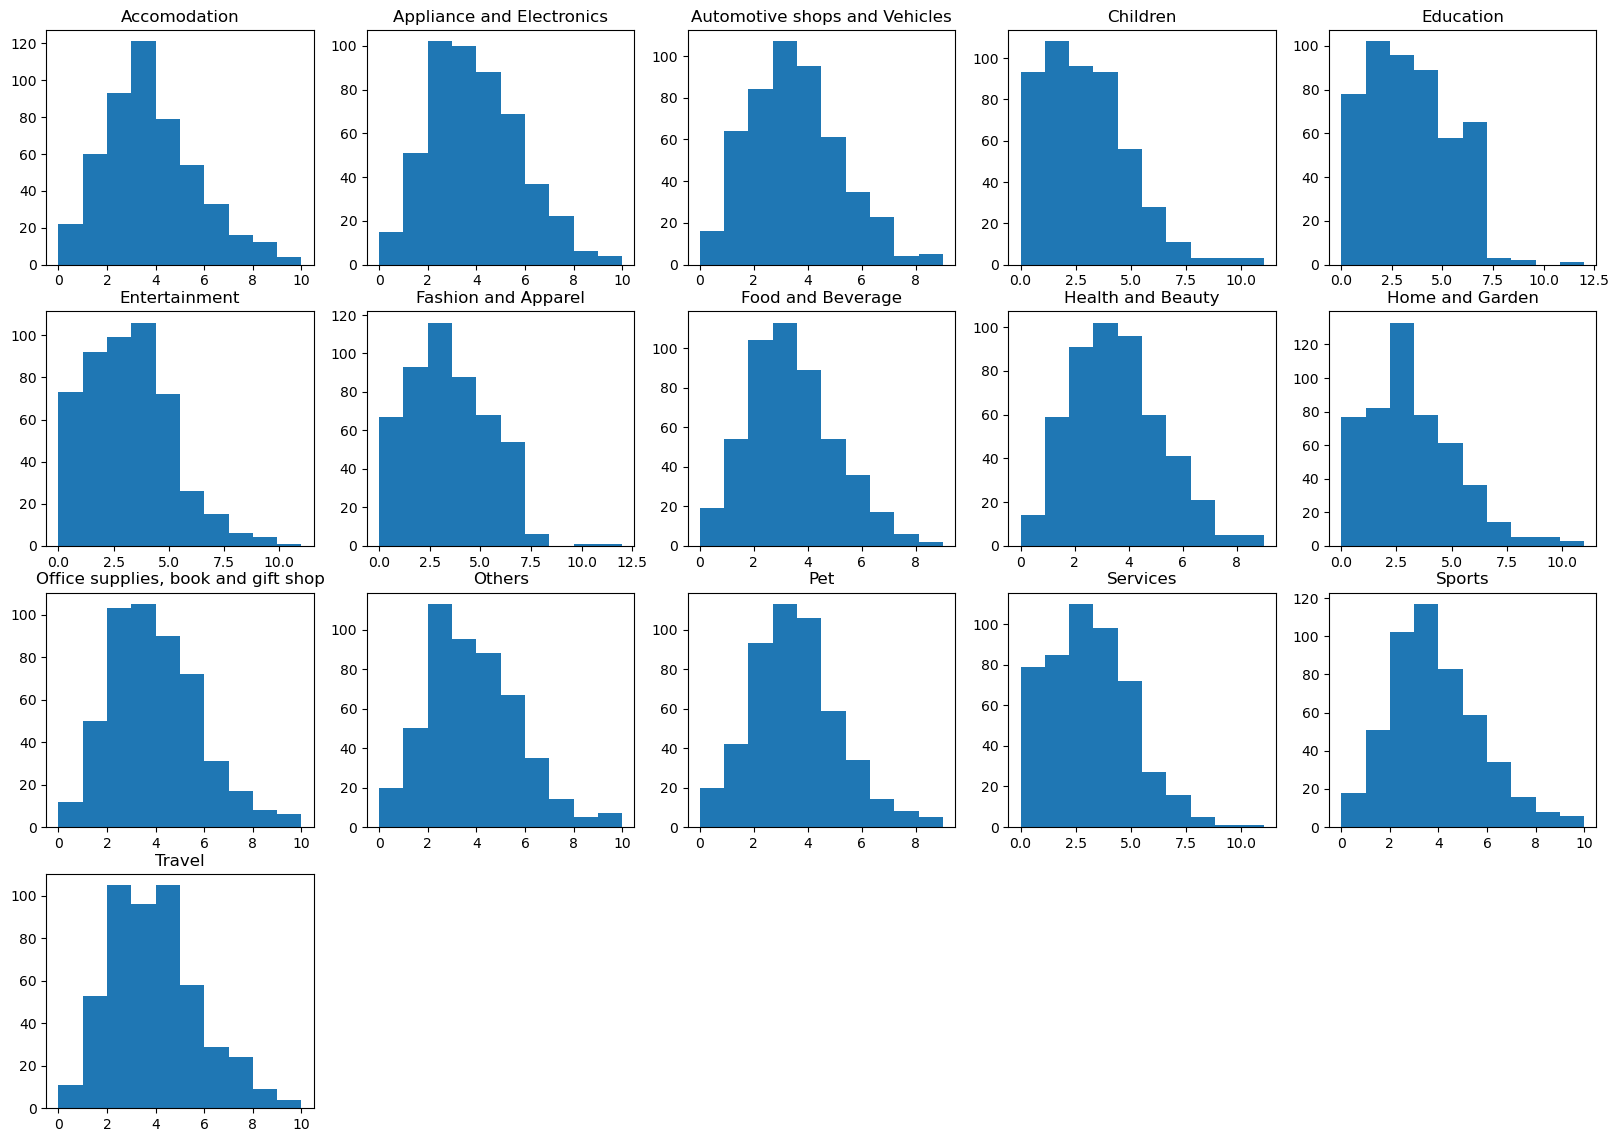

In [72]:
plt.figure(figsize = (20,14))

i = 1

for item in churning.columns[11:27]:
    plt.subplot(4,5,i)
    plt.hist(churning[item], bins = 10)
    plt.title(item)
    i += 1

In [73]:
# Count single activated and single inactivated
single_inact = churning[(churning["label"] == 1) & (churning["single"] == 1)]["single"].count()
single_act = churning[(churning["label"] == 0) & (churning["single"] == 1)]["single"].count()

marital_s = ["single activated", "single inactivated"]
val_s = [single_act, single_inact]

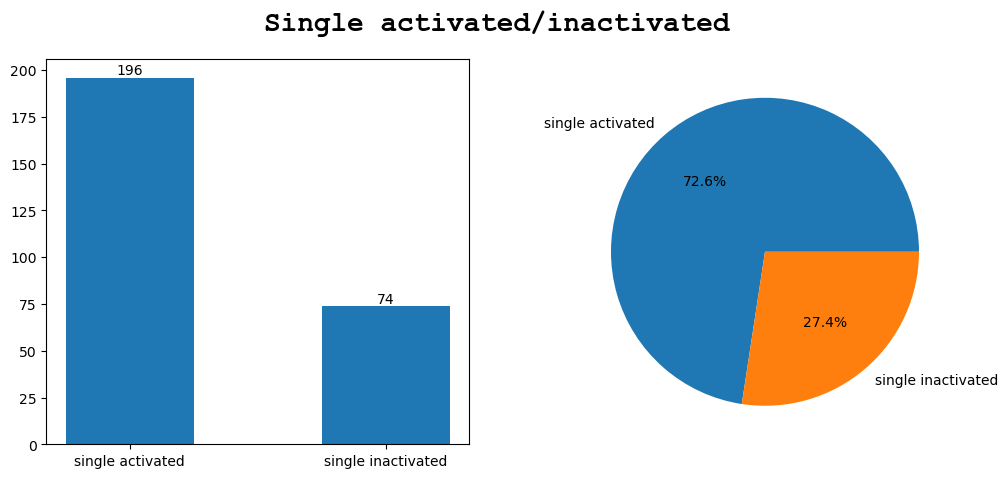

In [74]:
# Set figure size
plt.figure(figsize = (12,5))

# Plot bar chart 
plt.subplot(1,2,1)
s = plt.bar(marital_s, val_s, width = 0.5)
plt.bar_label(s, val_s)

# Plot pie chart
plt.subplot(1,2,2)
plt.pie(val_s, labels = marital_s,autopct = "%1.1f%%")

# Plot tiltle
plt.suptitle("Single activated/inactivated", weight = "bold", font = "courier new", size = 20)

plt.show()

In [75]:
# Count married activated and inactivated
married_inact = churning[(churning["label"] == 1) & (churning["married"] == 1)]["married"].count()
married_act = churning[(churning["label"] == 0) & (churning["married"] == 1)]["married"].count()

marital_m = ["married activated", "married inactivated"]
val_m = [married_act, married_inact]

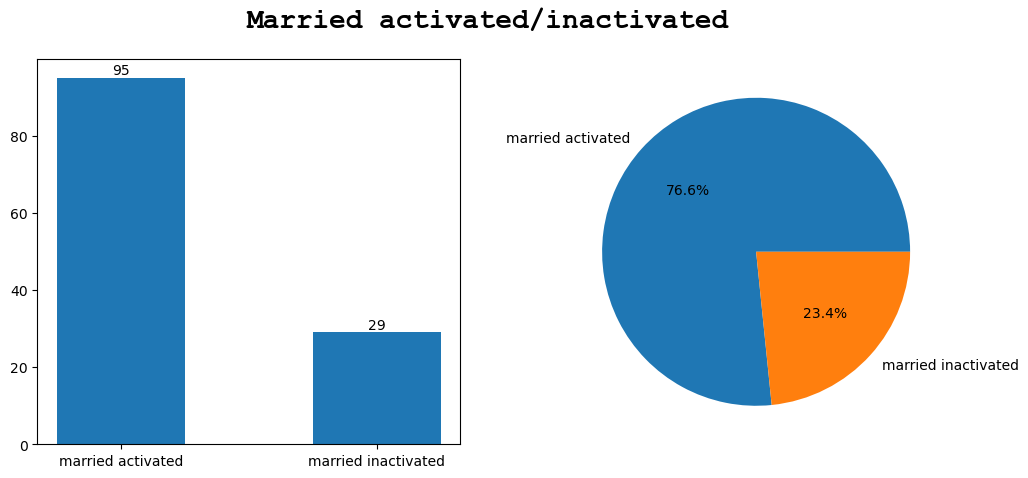

In [76]:
# Set figure size
plt.figure(figsize = (12,5))

# Plot bar chart 
plt.subplot(1,2,1)
m = plt.bar(marital_m, val_m, width = 0.5)
plt.bar_label(m, val_m)

# Plot pie chart
plt.subplot(1,2,2)
plt.pie(val_m, labels = marital_m,autopct = "%1.1f%%")

# Plot tiltle
plt.suptitle("Married activated/inactivated", weight = "bold", font = "courier new", size = 20)

plt.show()

In [77]:
# Count divorce/widow activated and inactivated
divorce_widow_inact = churning[(churning["label"] == 1) & (churning["divorce/widow"] == 1)]["married"].count()
divorce_widow_act = churning[(churning["label"] == 0) & (churning["divorce/widow"] == 1)]["married"].count()

marital_dw = ["divorce/widow activated", "divorce/widow inactivated"]
val_dw = [divorce_widow_act, divorce_widow_inact]

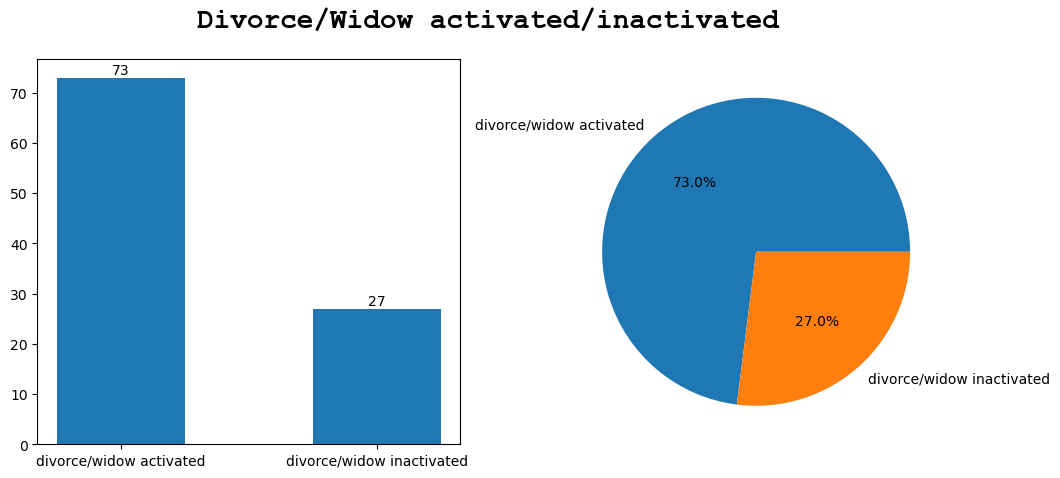

In [78]:
# Set figure size
plt.figure(figsize = (12,5))

# Plot bar chart 
plt.subplot(1,2,1)
dw = plt.bar(marital_dw, val_dw, width = 0.5)
plt.bar_label(dw, val_dw)

# Plot pie chart
plt.subplot(1,2,2)
plt.pie(val_dw, labels = marital_dw,autopct = "%1.1f%%")

# Plot tiltle
plt.suptitle("Divorce/Widow activated/inactivated", weight = "bold", font = "courier new", size = 20)

plt.show()

In [79]:
# Count Female activated and inactivated
f_inact = churning[(churning["F"] == 1) & (churning["label"] == 1)]["F"].count()
f_act = churning[(churning["F"] == 1) & (churning["label"] == 0)]["F"].count()

gender_f = ["Female activated", "Female inactivated"]
val_f = [f_act, f_inact]

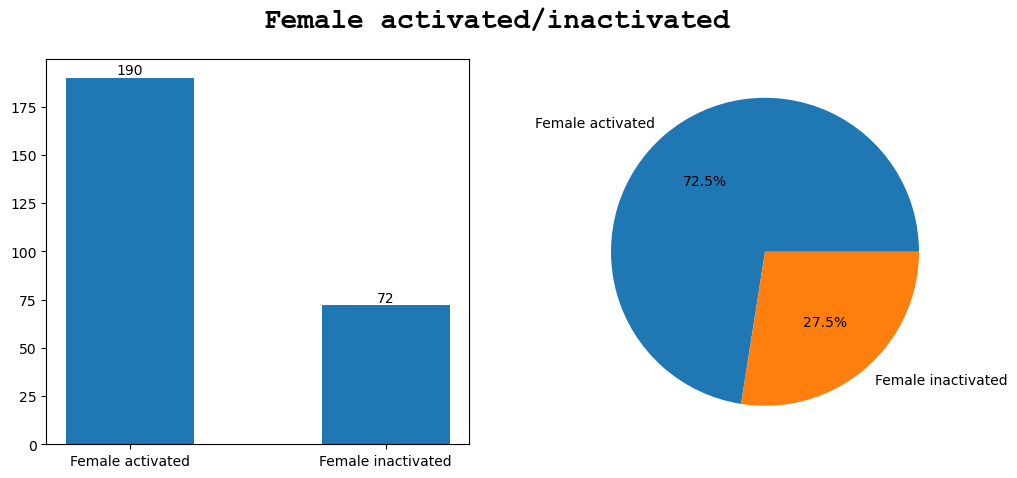

In [80]:
# Set figure size
plt.figure(figsize = (12,5))

# Plot bar chart 
plt.subplot(1,2,1)
f = plt.bar(gender_f, val_f, width = 0.5)
plt.bar_label(f, val_f)

# Plot pie chart
plt.subplot(1,2,2)
plt.pie(val_f, labels = gender_f,autopct = "%1.1f%%")

# Plot tiltle
plt.suptitle("Female activated/inactivated", weight = "bold", font = "courier new", size = 20)

plt.show()

In [81]:
# Count Female activated and inactivated
m_inact = churning[(churning["M"] == 1) & (churning["label"] == 1)]["M"].count()
m_act = churning[(churning["M"] == 1) & (churning["label"] == 0)]["M"].count()

gender_m = ["Male activated", "Male inactivated"]
val_m = [m_act, m_inact]

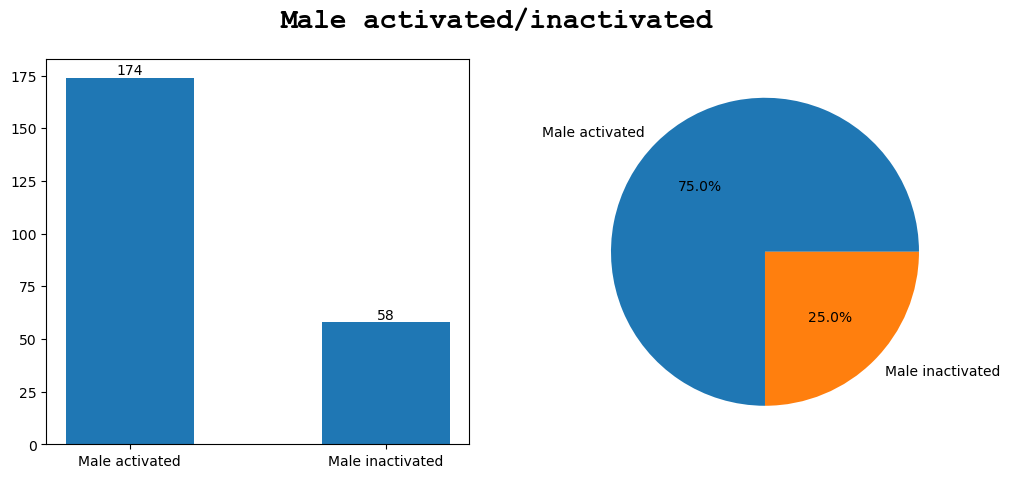

In [82]:
# Set figure size
plt.figure(figsize = (12,5))

# Plot bar chart 
plt.subplot(1,2,1)
m = plt.bar(gender_m, val_m, width = 0.5)
plt.bar_label(m, val_m)

# Plot pie chart
plt.subplot(1,2,2)
plt.pie(val_m, labels = gender_m,autopct = "%1.1f%%")

# Plot tiltle
plt.suptitle("Male activated/inactivated", weight = "bold", font = "courier new", size = 20)

plt.show()

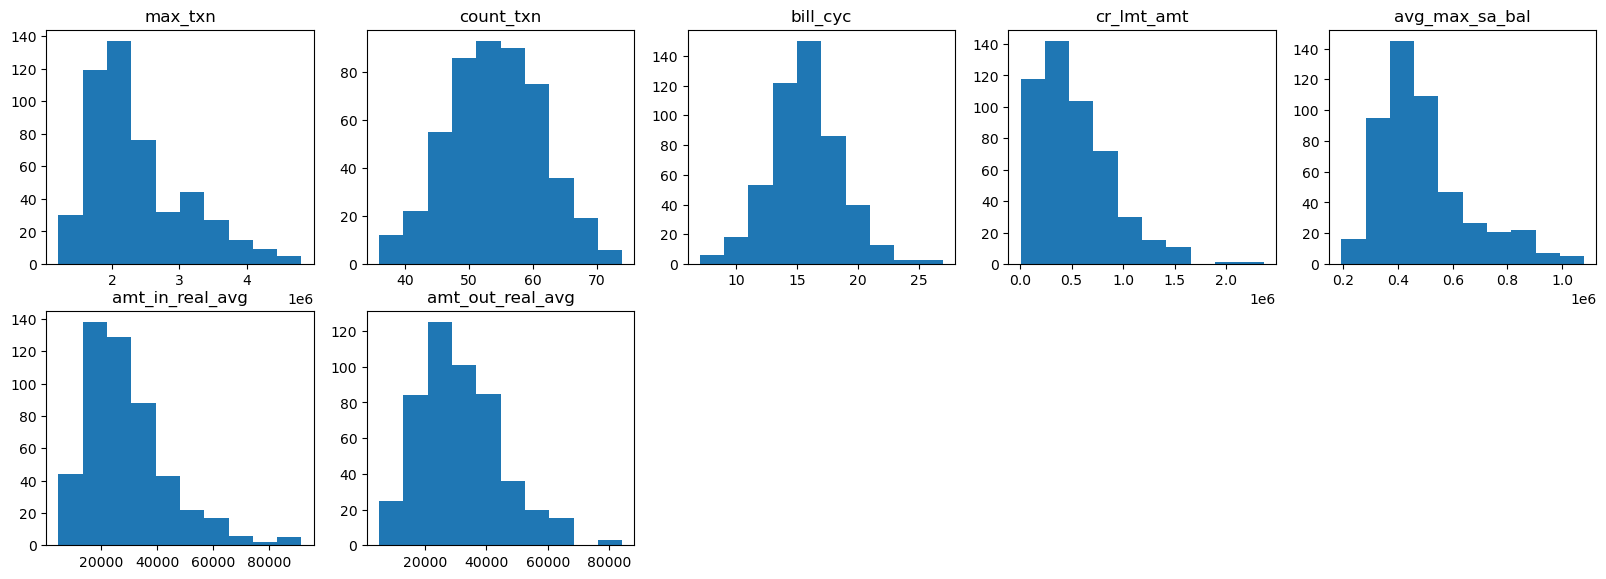

In [83]:
plt.figure(figsize = (20,14))

i = 1

for item in churning.columns[27:]:
    plt.subplot(4,5,i)
    plt.hist(churning[item], bins = 10)
    plt.title(item)
    i += 1

## Convert to normal distribution using log transformation

In [84]:
churning["max_txn"] = np.log(churning["max_txn"] + 1)
churning["count_txn"] = np.log(churning["count_txn"] + 1)
churning["bill_cyc"] = np.log(churning["bill_cyc"] + 1)
churning["cr_lmt_amt"] = np.log(churning["cr_lmt_amt"] + 1)
churning["avg_max_sa_bal"] = np.log(churning["avg_max_sa_bal"] + 1)
churning["amt_in_real_avg"] = np.log(churning["amt_in_real_avg"] + 1)
churning["amt_out_real_avg"] = np.log(churning["amt_out_real_avg"] + 1)

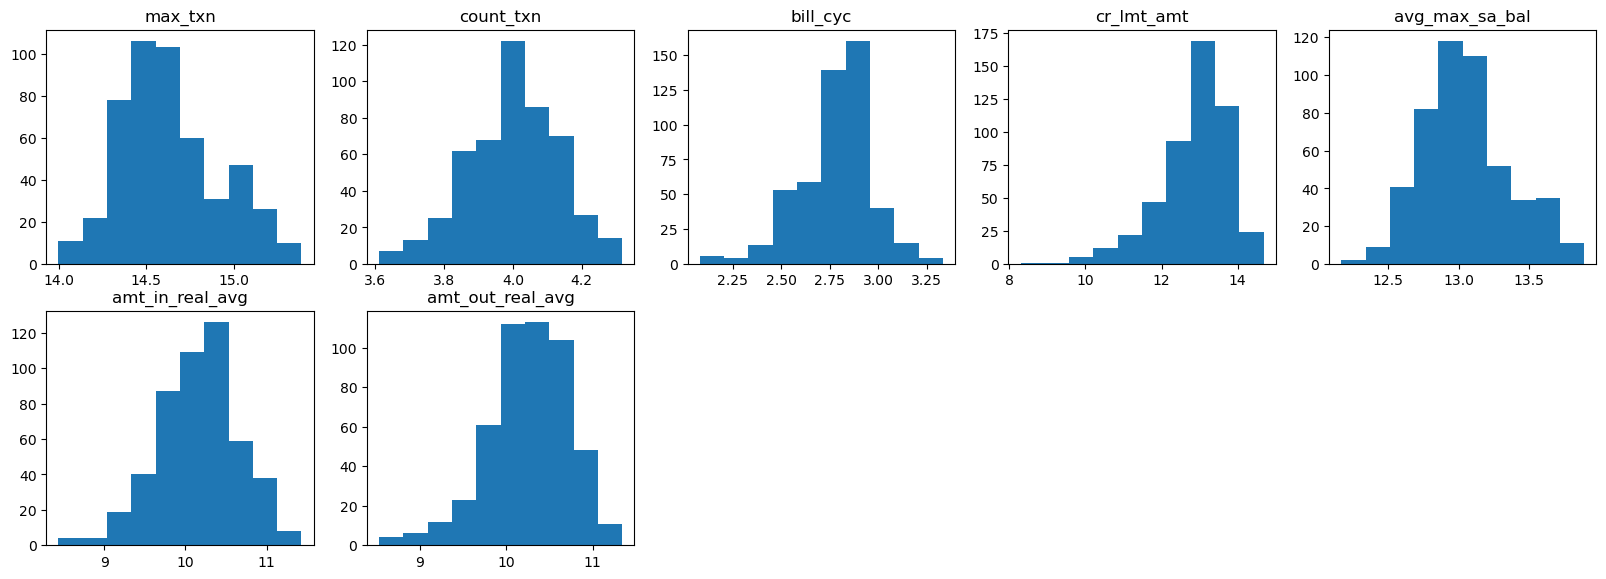

In [85]:
plt.figure(figsize = (20,14))

i = 1

for item in churning.columns[27:]:
    plt.subplot(4,5,i)
    plt.hist(churning[item], bins = 10)
    plt.title(item)
    i += 1

In [86]:
corr_find = churning.loc[:,"max_txn":].corr()
corr_find

,max_txn,count_txn,bill_cyc,cr_lmt_amt,avg_max_sa_bal,amt_in_real_avg,amt_out_real_avg
max_txn,1.000000,0.408662,0.019925,0.226472,0.554129,0.368205,0.350712
count_txn,0.408662,1.000000,0.047855,0.032922,-0.122209,0.022756,-0.074340
bill_cyc,0.019925,0.047855,1.000000,-0.039030,-0.015368,-0.024291,0.061863
cr_lmt_amt,0.226472,0.032922,-0.039030,1.000000,0.141564,0.135393,0.084052
avg_max_sa_bal,0.554129,-0.122209,-0.015368,0.141564,1.000000,0.299767,0.334260
amt_in_real_avg,0.368205,0.022756,-0.024291,0.135393,0.299767,1.000000,0.030698
amt_out_real_avg,0.350712,-0.074340,0.061863,0.084052,0.334260,0.030698,1.000000


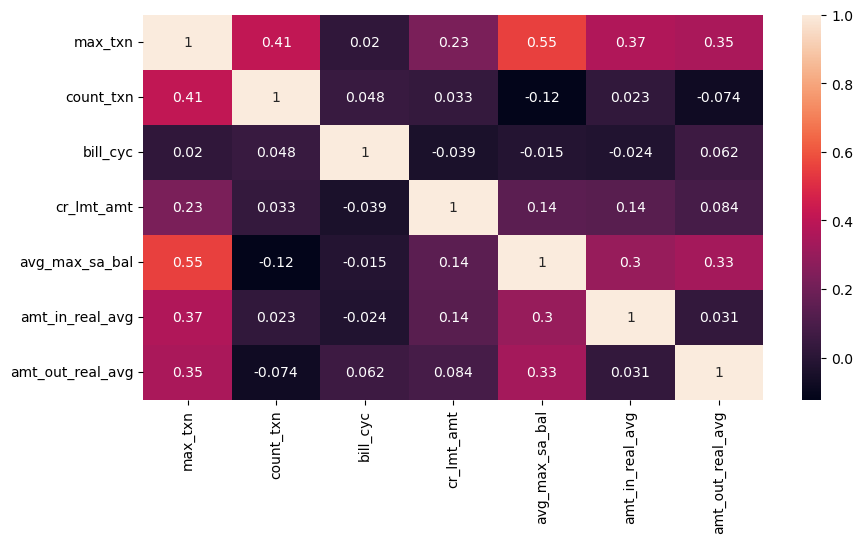

In [87]:
# Set figure size
plt.figure(figsize = (10,5))

sns.heatmap(corr_find, annot = True)

plt.show()

In [88]:
churning

,user_id,label,account_start_date,birth_year,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,...,Services,Sports,Travel,max_txn,count_txn,bill_cyc,cr_lmt_amt,avg_max_sa_bal,amt_in_real_avg,amt_out_real_avg
0,2723,1.0,24/10/1978,1938,4,15,0,1,0,1,...,5.0,5.0,1.0,15.065280,4.007333,3.332205,13.372345,12.948390,10.224894,11.017804
1,44088,1.0,19/11/1985,1952,3,3,0,0,1,0,...,2.0,6.0,7.0,15.239177,4.234107,2.772589,14.273569,13.578176,10.709621,10.514496
2,3139,0.0,17/08/1979,1951,4,8,1,0,0,1,...,3.0,2.0,1.0,14.618730,4.025352,2.708050,13.169249,13.031615,10.040565,8.842508
3,25596,0.0,04/07/1969,1938,1,3,0,0,1,0,...,0.0,5.0,4.0,14.677158,4.110874,2.833213,12.926351,12.827418,9.341856,10.038674
4,15409,0.0,09/05/1974,1947,4,14,0,0,1,0,...,1.0,2.0,4.0,14.654088,4.189655,2.772589,13.587356,12.213173,10.503819,9.191961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,31966,0.0,26/11/1972,1946,4,13,0,0,1,1,...,1.0,4.0,1.0,14.388588,4.007333,2.890372,12.587931,12.714084,9.724875,9.848725
490,38383,0.0,22/11/1979,1959,4,15,0,1,0,0,...,1.0,6.0,2.0,14.638190,4.110874,2.639057,13.514407,12.962415,10.082763,9.675799
491,41611,0.0,19/03/1976,1953,4,11,0,0,1,1,...,1.0,3.0,4.0,14.645789,4.043051,2.890372,12.837347,12.921372,9.824354,10.116787
492,2526,0.0,02/03/1969,1942,2,3,0,0,1,1,...,5.0,2.0,7.0,14.701528,4.060443,2.564949,13.051943,12.532302,10.334309,10.333278


In [89]:
# Change account_start_date from object to datetime
churning["account_start_date"] = pd.to_datetime(churning["account_start_date"])

# Change from date to only year 
churning["account_start_date"] = churning["account_start_date"].dt.year

# Change from datetime to int
churning["account_start_date"].astype("int")

C:\Users\YourName\AppData\Local\Temp\ipykernel_8708\612976893.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  churning["account_start_date"] = pd.to_datetime(churning["account_start_date"])


0      1978
1      1985
2      1979
3      1969
4      1974
       ... 
489    1972
490    1979
491    1976
492    1969
493    1974
Name: account_start_date, Length: 494, dtype: int32

In [90]:
# Assume that this year is 2017

# Find age of account
churning["account_start_date"] = 2017 - churning["account_start_date"]

# Find age of user
churning["birth_year"] = 2017 - churning["birth_year"]

In [91]:
# Change columns name
churning.rename(columns = {"account_start_date":"account_age", "birth_year":"age"}, inplace = True)

churning

,user_id,label,account_age,age,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,...,Services,Sports,Travel,max_txn,count_txn,bill_cyc,cr_lmt_amt,avg_max_sa_bal,amt_in_real_avg,amt_out_real_avg
0,2723,1.0,39,79,4,15,0,1,0,1,...,5.0,5.0,1.0,15.065280,4.007333,3.332205,13.372345,12.948390,10.224894,11.017804
1,44088,1.0,32,65,3,3,0,0,1,0,...,2.0,6.0,7.0,15.239177,4.234107,2.772589,14.273569,13.578176,10.709621,10.514496
2,3139,0.0,38,66,4,8,1,0,0,1,...,3.0,2.0,1.0,14.618730,4.025352,2.708050,13.169249,13.031615,10.040565,8.842508
3,25596,0.0,48,79,1,3,0,0,1,0,...,0.0,5.0,4.0,14.677158,4.110874,2.833213,12.926351,12.827418,9.341856,10.038674
4,15409,0.0,43,70,4,14,0,0,1,0,...,1.0,2.0,4.0,14.654088,4.189655,2.772589,13.587356,12.213173,10.503819,9.191961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,31966,0.0,45,71,4,13,0,0,1,1,...,1.0,4.0,1.0,14.388588,4.007333,2.890372,12.587931,12.714084,9.724875,9.848725
490,38383,0.0,38,58,4,15,0,1,0,0,...,1.0,6.0,2.0,14.638190,4.110874,2.639057,13.514407,12.962415,10.082763,9.675799
491,41611,0.0,41,64,4,11,0,0,1,1,...,1.0,3.0,4.0,14.645789,4.043051,2.890372,12.837347,12.921372,9.824354,10.116787
492,2526,0.0,48,75,2,3,0,0,1,1,...,5.0,2.0,7.0,14.701528,4.060443,2.564949,13.051943,12.532302,10.334309,10.333278


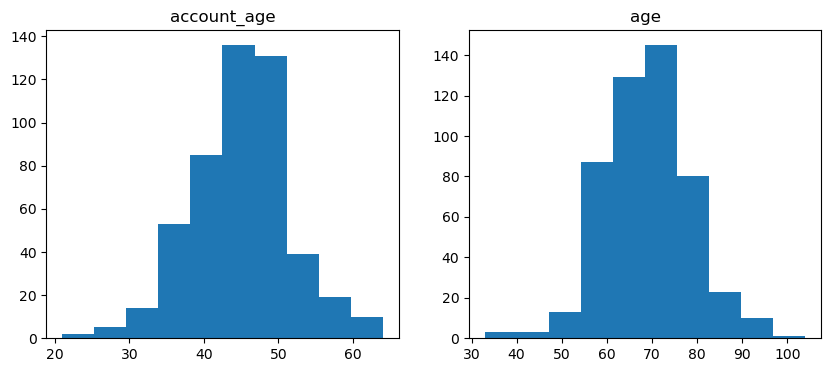

In [92]:
plt.figure(figsize = (10,4))

i = 1

for item in churning.columns[2:4]:
    plt.subplot(1,2,i)
    plt.hist(churning[item], bins = 10)
    plt.title(item)
    i += 1

## Convert to normal distribution using log transformation

In [93]:
churning["account_age"] = np.log(churning["account_age"] + 1)
churning["age"] = np.log(churning["age"] + 1)

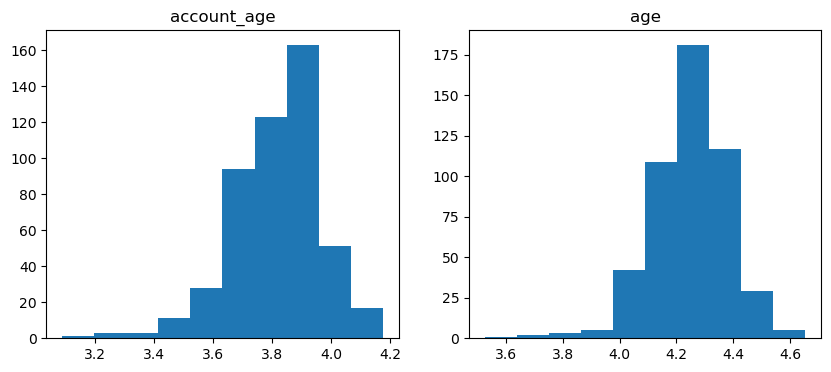

In [94]:
plt.figure(figsize = (10,4))

i = 1

for item in churning.columns[2:4]:
    plt.subplot(1,2,i)
    plt.hist(churning[item], bins = 10)
    plt.title(item)
    i += 1

In [95]:
# Drop user_id column
churning.drop(columns = "user_id", inplace = True)

churning

,label,account_age,age,family_income_segment_code,individual_income_segment_code,divorce/widow,married,single,F,M,...,Services,Sports,Travel,max_txn,count_txn,bill_cyc,cr_lmt_amt,avg_max_sa_bal,amt_in_real_avg,amt_out_real_avg
0,1.0,3.688879,4.382027,4,15,0,1,0,1,0,...,5.0,5.0,1.0,15.065280,4.007333,3.332205,13.372345,12.948390,10.224894,11.017804
1,1.0,3.496508,4.189655,3,3,0,0,1,0,1,...,2.0,6.0,7.0,15.239177,4.234107,2.772589,14.273569,13.578176,10.709621,10.514496
2,0.0,3.663562,4.204693,4,8,1,0,0,1,0,...,3.0,2.0,1.0,14.618730,4.025352,2.708050,13.169249,13.031615,10.040565,8.842508
3,0.0,3.891820,4.382027,1,3,0,0,1,0,1,...,0.0,5.0,4.0,14.677158,4.110874,2.833213,12.926351,12.827418,9.341856,10.038674
4,0.0,3.784190,4.262680,4,14,0,0,1,0,1,...,1.0,2.0,4.0,14.654088,4.189655,2.772589,13.587356,12.213173,10.503819,9.191961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.0,3.828641,4.276666,4,13,0,0,1,1,0,...,1.0,4.0,1.0,14.388588,4.007333,2.890372,12.587931,12.714084,9.724875,9.848725
490,0.0,3.663562,4.077537,4,15,0,1,0,0,1,...,1.0,6.0,2.0,14.638190,4.110874,2.639057,13.514407,12.962415,10.082763,9.675799
491,0.0,3.737670,4.174387,4,11,0,0,1,1,0,...,1.0,3.0,4.0,14.645789,4.043051,2.890372,12.837347,12.921372,9.824354,10.116787
492,0.0,3.891820,4.330733,2,3,0,0,1,1,0,...,5.0,2.0,7.0,14.701528,4.060443,2.564949,13.051943,12.532302,10.334309,10.333278


---
# Create a binary classification machine learning model
---

## Train Test Split

In [96]:
x = churning.loc[:,"account_age":]
y = churning[["label"]]

In [97]:
# Import train test spli
from sklearn.model_selection import train_test_split

In [98]:
# Split to the ratio of 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [99]:
# Size comparison
print(f'x_train size = {len(x_train)}')
print(f'x_test size = {len(x_test)}')
print(f'y_train size = {len(y_train)}')
print(f'y_test size = {len(y_test)}')

x_train size = 345
x_test size = 149
y_train size = 345
y_test size = 149


---
## Logistic Regression

In [100]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creat model
logis_model = LogisticRegression(max_iter = 1000)

# Fit model
logis_model.fit(x_train, y_train.values.ravel())

# Predict the test data
prediction_logis = logis_model.predict(x_test)
prediction_logis

array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.])

In [101]:
# Find accuracy of the model
logis_model.score(x_test, y_test)

0.9731543624161074

In [102]:
# Import classification_report
from sklearn.metrics import classification_report

In [103]:
# Store value in variable
report_logis = classification_report(y_test, prediction_logis, target_names = ["0 active", "1 inactive"], output_dict = True)

# show precision and recall
print(classification_report(y_test, prediction_logis, target_names = ["0 active", "1 inactive"]))

              precision    recall  f1-score   support

    0 active       0.97      0.99      0.98       115
  1 inactive       0.97      0.91      0.94        34

    accuracy                           0.97       149
   macro avg       0.97      0.95      0.96       149
weighted avg       0.97      0.97      0.97       149



**F2 score for 0 (active)**

In [104]:
print(f'0 precision = {report_logis["0 active"]["precision"]}')
print(f'0 recall = {report_logis["0 active"]["recall"]}')

0 precision = 0.9743589743589743
0 recall = 0.991304347826087


In [105]:
# Calculate F2 score
F2_0 = 5 * ((report_logis["0 active"]["precision"] * report_logis["0 active"]["recall"]) / ((4 * report_logis["0 active"]["precision"]) + report_logis["0 active"]["recall"]))

print(f'F2 score for 0 is {F2_0}')

F2 score for 0 is 0.9878682842287695


**F2 score for 1 (inactive)**

In [106]:
print(f'1 precision = {report_logis["1 inactive"]["precision"]}')
print(f'1 recall = {report_logis["1 inactive"]["recall"]}')

1 precision = 0.96875
1 recall = 0.9117647058823529


In [107]:
# Calculate F2 score
F2_1 = 5 * ((report_logis["1 inactive"]["precision"] * report_logis["1 inactive"]["recall"]) / ((4 * report_logis["1 inactive"]["precision"]) + report_logis["1 inactive"]["recall"]))

print(f'F2 score for 1 is {F2_1}')

F2 score for 1 is 0.9226190476190476


---
## Random Forest

In [108]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create model
random_model = RandomForestClassifier()

# Fit model
random_model.fit(x_train, y_train.values.ravel())

# Predict the test data
prediction_random = random_model.predict(x_test)
prediction_random

array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.])

In [109]:
# Find accuracy of the model
random_model.score(x_test, y_test)

0.9865771812080537

In [110]:
# Store value in variable
report_random = classification_report(y_test, prediction_random, target_names = ["0 active", "1 inactive"], output_dict = True)

# show precision and recall
print(classification_report(y_test, prediction_random, target_names = ["0 active", "1 inactive"]))

              precision    recall  f1-score   support

    0 active       0.99      0.99      0.99       115
  1 inactive       0.97      0.97      0.97        34

    accuracy                           0.99       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.99      0.99      0.99       149



**F2 score for 0 (active)**

In [111]:
print(f'0 precision = {report_random["0 active"]["precision"]}')
print(f'0 recall = {report_random["0 active"]["recall"]}')

0 precision = 0.991304347826087
0 recall = 0.991304347826087


In [112]:
# Calculate F2 score
F2_0 = 5 * ((report_random["0 active"]["precision"] * report_random["0 active"]["recall"]) / ((4 * report_random["0 active"]["precision"]) + report_random["0 active"]["recall"]))

print(f'F2 score for 0 is {F2_0}')

F2 score for 0 is 0.9913043478260869


**F2 score for 1 (inactive)**

In [113]:
print(f'1 precision = {report_random["1 inactive"]["precision"]}')
print(f'1 recall = {report_random["1 inactive"]["recall"]}')

1 precision = 0.9705882352941176
1 recall = 0.9705882352941176


In [114]:
# Calculate F2 score
F2_1 = 5 * ((report_random["1 inactive"]["precision"] * report_random["1 inactive"]["recall"]) / ((4 * report_random["1 inactive"]["precision"]) + report_random["1 inactive"]["recall"]))

print(f'F2 score for 1 is {F2_1}')

F2 score for 1 is 0.9705882352941176
